# Computation
***

Computation is a sub-field of computer science that explores types of problems where solution can be created using Computers [[0]](#toa-wikipedia), commonly when a computer comes to mind, its is though of as a physical machine, but it can be anything that can do computation, these were abstract machines before the dawn of modern computing.

A computer is something that can do computations automatically, the theory of automation is called automata.

# Growth Rates

It's important to understand the different between linear and polynomial growth,<br>
quantum computers can handle problems with much higher complexities with more ease,<br>

There are various notations for describing growth relation between the input size and the resources required to compute it, Big O notation describes the upper bound of a function, passing an input n to a function, the Big O function must be more than or equal to the origial function.

# Exercise 1
Describe and plot five examples of pairs of functions $f$ and $g$ such that $f$ is $O(g)$.

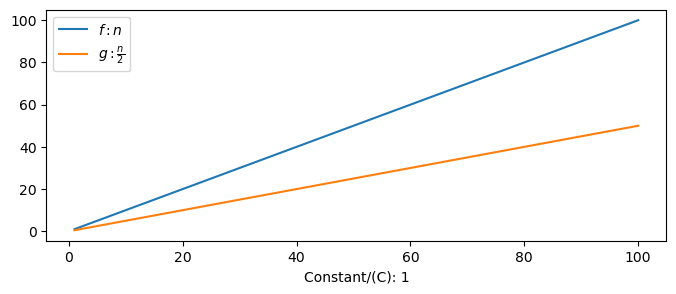

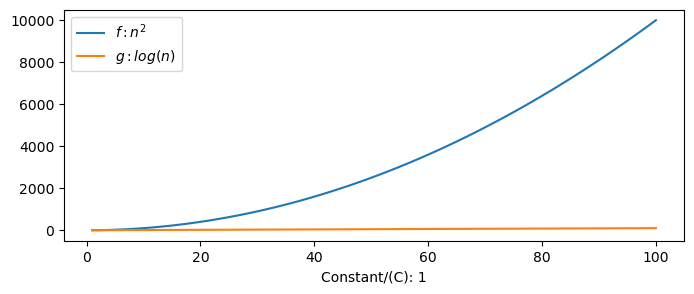

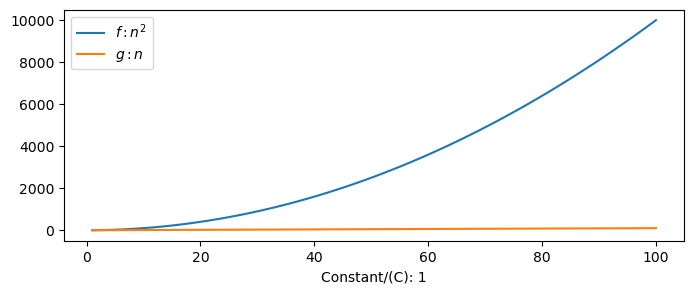

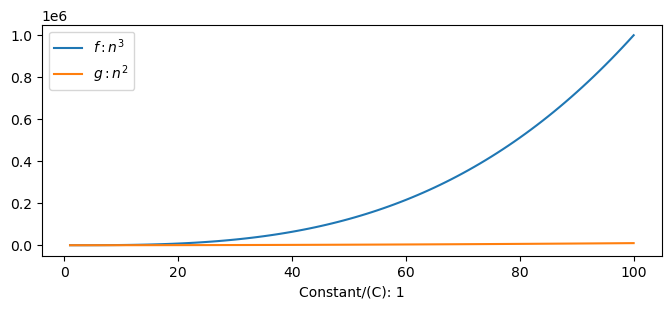

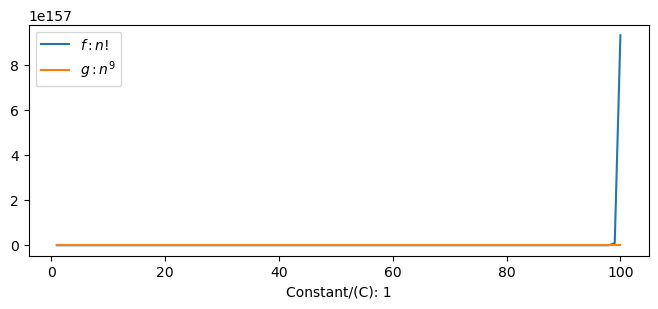

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np

def factorial(n_array):
    n_array = n_array.copy()
    for i in range(len(n_array)):
        n_array[i] = math.factorial(int(n_array[i]))
    return n_array

def log(n_array):
    n_array = n_array.copy()
    np.log(n_array)
    return n_array

func_pair_list = [
    {
        "func_f": lambda n: n, "func_g": lambda n: n / 2,
        "func_f_label": r"$f: n$","func_g_label": r"$g: \frac{n}{2}$",
        "constant_c": 1
    },
    {
        "func_f": lambda n: n ** 2, "func_g": lambda n: log(n),
        "func_f_label": "$f: n^2$", "func_g_label": "$g: log(n)$",
        "constant_c": 1
    },
    {
        "func_f": lambda n: n ** 2, "func_g": lambda n: n,
        "func_f_label": "$f: n^2$", "func_g_label": "$g: n$",
        "constant_c": 1
    },
    {
        "func_f": lambda n: n ** 3, "func_g": lambda n: n ** 2,
        "func_f_label": "$f: n^3$", "func_g_label": "$g: n^2$",
        "constant_c": 1
    },
    {
        "func_f": lambda n: factorial(n), "func_g": lambda n: n ** 2,
        "func_f_label": "$f: n!$", "func_g_label": "$g: n^9$",
        "constant_c": 1
    }
]

for plot_i in range(len(func_pair_list)):
    fig, ax = plt.subplots(figsize=(8, 3))
    
    n = np.linspace(1, 100, 100)
    
    func_f, func_g = func_pair_list[plot_i]["func_f"], func_pair_list[plot_i]["func_g"]
    func_f_label = func_pair_list[plot_i]["func_f_label"]
    func_g_label = func_pair_list[plot_i]["func_g_label"]
    constant_c = func_pair_list[plot_i]["constant_c"]

    ax.plot(n, func_f(n), label=func_f_label)
    ax.plot(n, func_g(n) * constant_c, label=func_g_label)
    ax.set_xlabel("Constant/(C): " + str(constant_c))
    
    ax.legend()
    plt.show()

These are valid Big O for each function but no very useful because they are tightly bound

## Turing Machine

In [2]:
def run_turing_machine(tape, initial_state, table, debug_messages=False):
    pos = 0 # Position on tape.
    state = initial_state # Initial state is first in table.

    # Keep going while we are not in a halting state.
    while state not in ['T', 'F']:
        # Print the current status.
        if debug_messages == True:
            print(''.join(tape[:pos]) + state + ''.join(tape[pos:]))
        # Get the row of the table.
        row = table[(state, tape[pos])]
        # Overwrite the symbol.
        tape[pos] = row[0]
        # Move left or right.
        if row[1] == 'R':
            # Put blanks on tape as necessary.
            if pos == len(tape) - 1:
                tape += ['_']
            # Increase position.
            pos += 1
        else:
            # Put blanks on tape as necessary.
            if pos == 0:
                tape = ['_'] + tape
                # The position on the tape has to move with it.
                pos += 1
            # Decrease position.
            pos -= 1
        # Update the state.
        state = row[2]

    # Print the current status.
    if debug_messages == True:
        print(''.join(tape[:pos]) + state + ''.join(tape[pos:]))
        
    return tape, state

The code above is derived from [[2]](#03-computation) Ian McLoughlins, 03-computation.ipynb notebook, I have turned it into a function to allow for reuse, and added some test cases, it currently returns **True** if a input contains all zeros, else returns True.

# Exercise 2
Check if input contains all zeros

In [3]:
def contain_all_zero(tape):
    # State table.
    state_table = {
        ('X', '_'): ['_', 'R', 'T'],
        ('X', '0'): ['0', 'R', 'X'],
        ('X', '1'): ['1', 'R', 'Y'],
        ('Y', '_'): ['_', 'R', 'F'],
        ('Y', '0'): ['0', 'R', 'Y'],
        ('Y', '1'): ['1', 'R', 'Y'],
    }

    return run_turing_machine(tape, 'X', state_table, False)[1] == 'T'

In [4]:
# Tape input.
tape = list('0101111')
contain_all_zero(tape)

test_cases = [
    (list("0101111"), False),
    (list("1111111"), False),
    (list("1101110"), False),
    (list("0000000"), True)
]

print("Contain all zeros")
for test in test_cases:
    print(''.join(test[0]), contain_all_zero(test[0]))

all_tests_pass = all([contain_all_zero(test[0]) == test[1] for test in test_cases])
if all_tests_pass: print("All tests pass")

Contain all zeros
0101111 False
1111111 False
1101110 False
0000000 True
All tests pass


## Unary addition

In [5]:
def addition(x, y, debug_messages=False):
    tape = ("1" * x) + "+" + ("1" * y)
    
    state_table = {
        ('X', '1'): ['=', 'R', 'Y'],
        ('Y', '1'): ['1', 'R', 'Y'],
        ('Y', '+'): ['1', 'R', 'Y'],
        ('Y', '_'): ['_', 'R', 'F']
    }
    
    output = run_turing_machine(list(tape), 'X', state_table, False)[0]
    output = ''.join(output)[1:-2]
    return len(output)

In [6]:
import random

print("addition(100, 99) = ", addition(100, 99))

all_tests_pass = True
for i in range(10):
    i = random.randint(0, 1000)
    j = random.randint(0, 1000)
    
    if addition(i, j) != (i + j):
        all_tests_pass = False
if all_tests_pass: print("All tests pass")

addition(100, 99) =  199
All tests pass


# Bit Twiddling

Memory on computers is indexed in terms of bytes and are highly optimised for this, processors are likely using lookup tables to speed up computations because of this, dealing with bit is expensive because of this

In [7]:
def to_upper(s):
    # Using a bit mask you can convert any ASCII char to its upper case version
    # This is possible because in ASCII the upper case equivilent
    # Is only different by one bit
    return ''.join([chr(ord(ch) & 0b1011111) for ch in s])

def to_lower(s):
    return ''.join([chr(ord(ch) | (ord('a') - ord('A'))) for ch in s])

def multiply_by_two(x):
    # Since computers store data in bits
    # Shifting to the left will move each bit power to the next number
    # And multiply it by two
    return x << 1

print(to_upper("Hello"))
print(to_lower("HELlo"))
print("multiply_by_two(100) = ", multiply_by_two(100))

HELLO
hello
multiply_by_two(100) =  200


# Complex Number Arithemtic

In [8]:
def add_lists(x, y):
    return [(x[i] + y[i]) for i in range(len(x))]

def mul_lists(x, y):
    a1, b1 = x
    a2, b2 = y
    return [a1 * a2 - b1 * b2, a1 * b2 + b1 * a2]

list_1, list_2 = [3, 5], [-2, 7]

sum_of_two_lists = add_lists(list_1, list_2)
print(f"The sum of the two lists is: {sum_of_two_lists}")

product_of_two_lists = mul_lists(list_1, list_2)
print(f"The product of the two lists is: {product_of_two_lists}")

The sum of the two lists is: [1, 12]
The product of the two lists is: [-41, 11]


In [9]:
# In python complex numbers are abstracted into a class
# There is methods overriding the arithmetic operations
class Complex:
    def __init__(self, a, b):
        self.a, self.b = a, b
        
    def __add__(self, other):
        return Complex(self.a + other.a, self.b + other.b)
    
    def __mul__(self, other):
        return Complex(self.a * other.a - self.b * other.b,
                self.a * other.b + self.b * other.a)
    
    def __str__(self):
        return f"Complex({self.a}, {self.b})"
    
print(f"Complex(3, 5j) * Complex(-2, 7j): {Complex(3, 5) * Complex(-2, 7)}")
print(f"(3 + 5j) * (-2 + 7j): {(3 + 5j) * (-2 + 7j)}")

Complex(3, 5j) * Complex(-2, 7j): Complex(-41, 11)
(3 + 5j) * (-2 + 7j): (-41+11j)


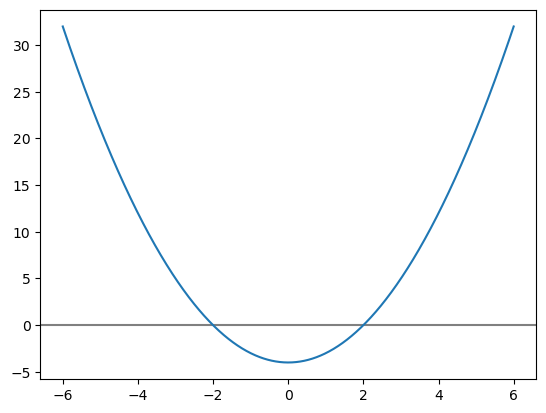

In [10]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-6, 6, 1000)
y = x ** 2 - 4

fig, ax = plt.subplots()
ax.axhline(0, color="grey")

ax.plot(x, y)
plt.show()

# References
[0] <a id="toa-wikipedia"></a>https://en.wikipedia.org/wiki/Theory_of_computation<br>
[1] https://www.youtube.com/watch?v=0D7yInuKvKs<br>
[2] <a id="03-computation"></a>https://github.com/ianmcloughlin/2223-S1-emerging-technologies/blob/main/notebooks/03-computation.ipynb<br>
[3] https://introcs.cs.princeton.edu/java/52turing